In [1]:
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import sys

# from mapping.behavioral import Behavior, BehavioralAnalyses, figs_and_text
# from mapping.classifier import Classifier
# from mapping.experiment import Experiment, LoadData, demo
# from mapping.neuron import Neuron
# from mapping.population import Population, PopParams
# from mapping import notebook_funcs as funcs

from mapping import (
    behavioral, classifier, experiment, neuron, population, 
    notebook_funcs as funcs
)

%matplotlib inline

In [2]:
modules = [behavioral, classifier, experiment, neuron, population, funcs]
for module in modules:
    importlib.reload(module)

In [4]:
behavioral.BehavioralAnalyses

mapping.behavioral.BehavioralAnalyses

# Behavioral

#### Behavioral metrics demonstrates that monkeys understand the relationship between stimuli and outcomes. 

(A) Proportion time spend licking as a function of time relative to reward onset for rewarded trials (blue) and neutral trials (red). Proportion of time spent licking immmediately prior to reward (250 ms prior to reward onset, or equivalent time on non-rewarded trials) was signicantly higher for rewarded trials (3-way ANOVA, P < 0.0001); there was no effect of monkey (Monkey T vs. Monkey S, P > 0.15), stimulus direction (ipsilateral vs. contralateral, P > 0.76) or any two/three-way interactions (P > 0.15). 

In [3]:
ba = behavioral.BehavioralAnalyses()
ba.plot_licking()
# p_licking = ba.licking_across_monkey()
# funcs.print_anova(p_licking, title='licking')
ba.licking_anova()

AttributeError: Can't get attribute 'Behavior' on <module '__main__'>

#### Hit rate for rewarded trials (blue) and neutral trials (red).

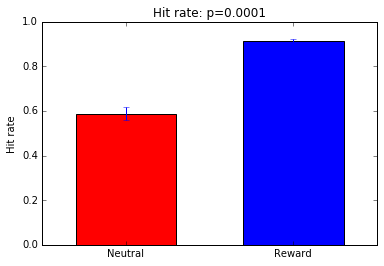

*** Pair-wise Wilcoxons
	Tom:    0.0022
	Spaghetti:    0.0180
	Ipsi.:    0.0001
	Contra.:    0.0001
	Cue set 0:    0.0001
	Cue set 1:    0.0001


/Users/syi115/anaconda/envs/mapping/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [5]:
ba.plot_hr()
funcs.print_wilcoxons(
    p_monkey=ba.hr_per_monkey(),
    p_dir=ba.hr_per_dir(),
    p_set=ba.hr_per_set(),
    title="Hit Rate"
)

#### Reaction times for rewarded trials (blue) and neutral trials (red).

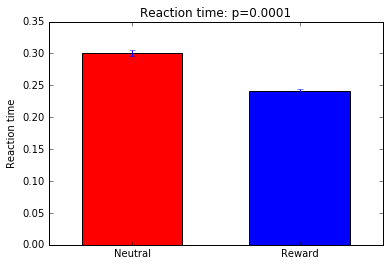

*** Pair-wise Wilcoxons
	Tom:    0.0022
	Spaghetti:    0.0180
	Ipsi.:    0.0001
	Contra.:    0.0001
	Cue set 0:    0.0001
	Cue set 1:    0.0001


/Users/syi115/anaconda/envs/mapping/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [6]:
ba.plot_rt()
funcs.print_wilcoxons(
    p_monkey=ba.rt_per_monkey(),
    p_dir=ba.rt_per_dir(),
    p_set=ba.rt_per_set(),
    title="Reaction Time"
)

# Example Neurons

#### Example neurons plots including
* PSTH for each `reward condition`
* PSTH for each `reward condition` and `spatial location`
* Heatmap of `receptive field` for fitted 2-dimensional gaussian in each `reward condition`

Loading neuron tn_map_120914 elec10a


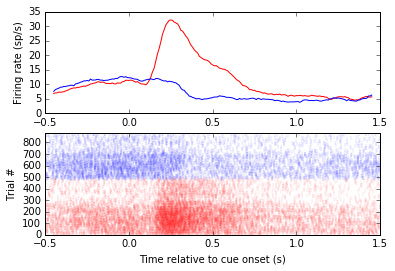

/Users/syi115/anaconda/envs/mapping/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


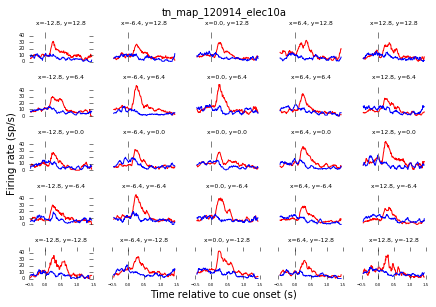

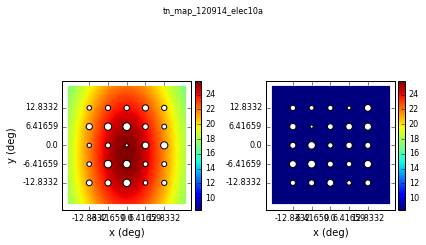

Loading neuron tn_map_120914 elec21a


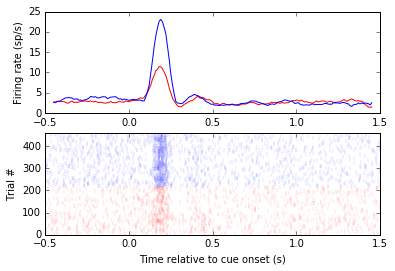

/Users/syi115/anaconda/envs/mapping/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


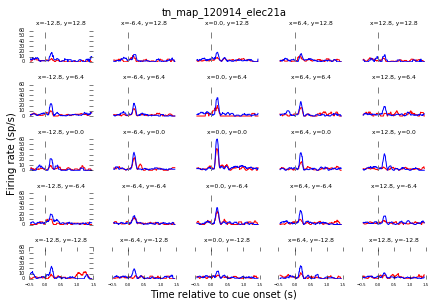

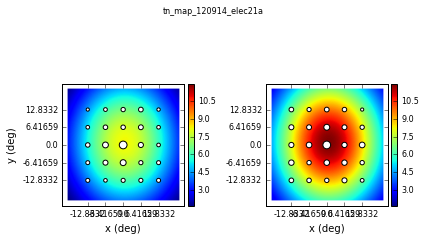

Loading neuron tn_map_121114 elec11U


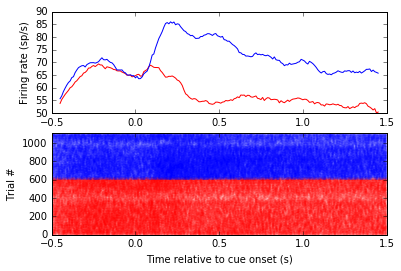

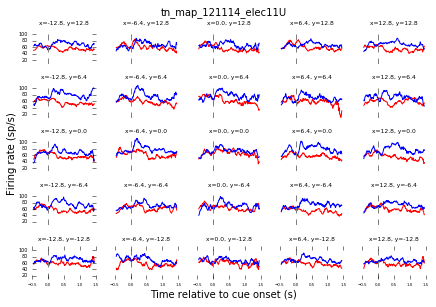

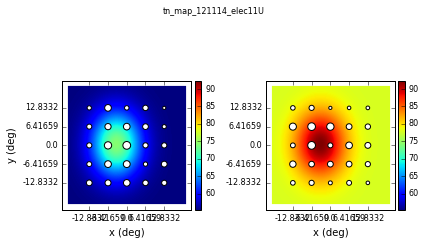

Loading neuron tn_map_122914 elec7U


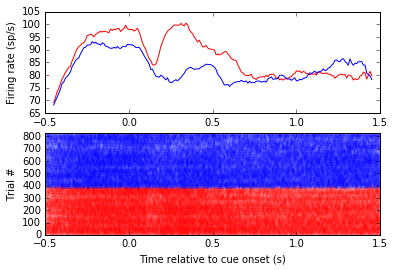

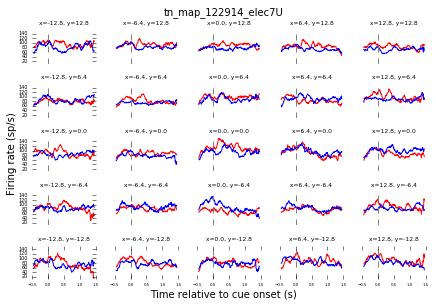

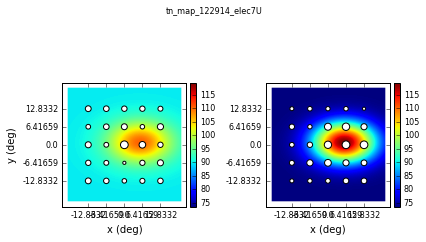

Loading neuron tn_map_121214 elec13U


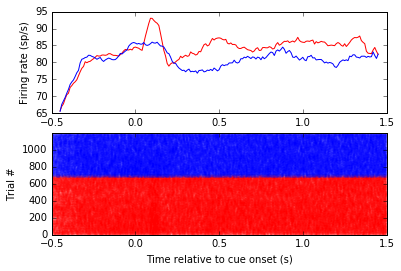

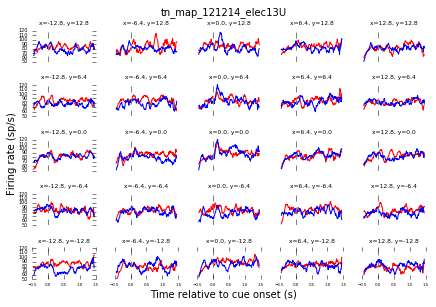

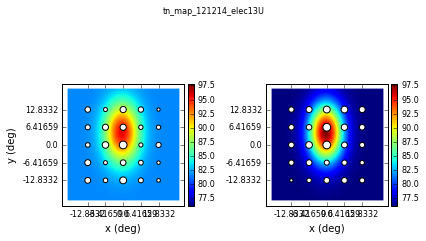

Loading neuron tn_map_121614 elec17U


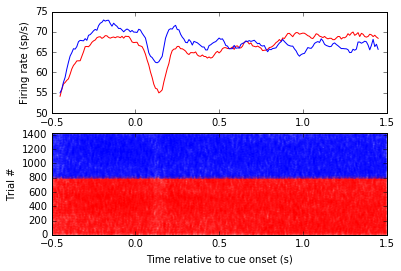

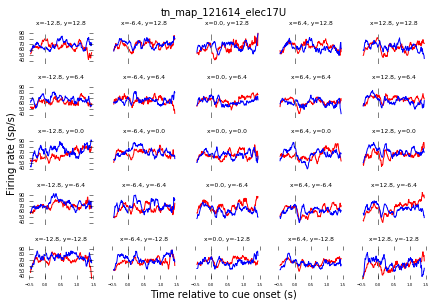

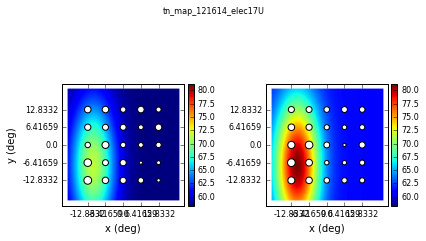

Loading neuron tn_map_121614 elec3b


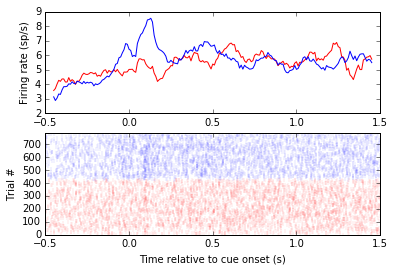

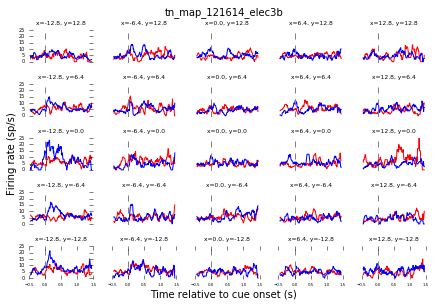

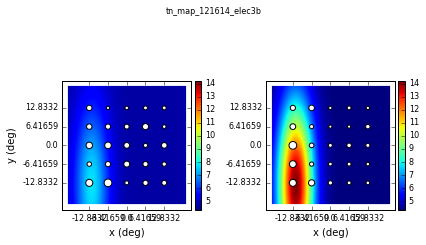

Loading neuron tn_map_123014 elec11U


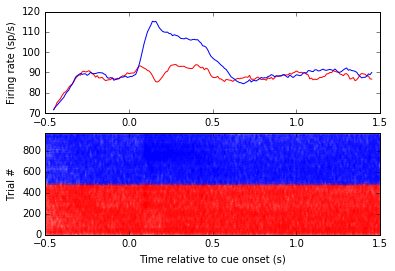

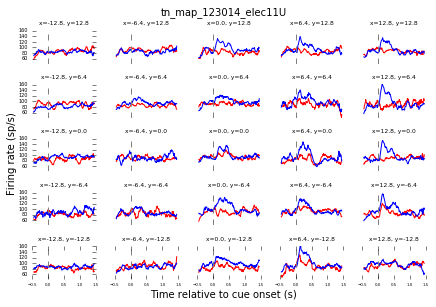

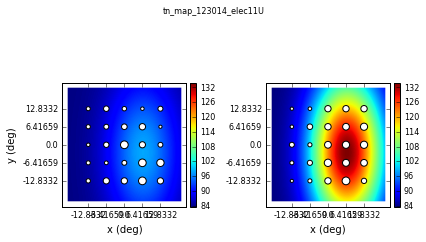

Loading neuron tn_map_123014 elec9U


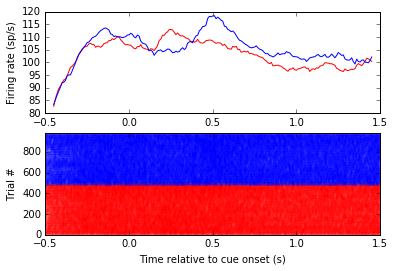

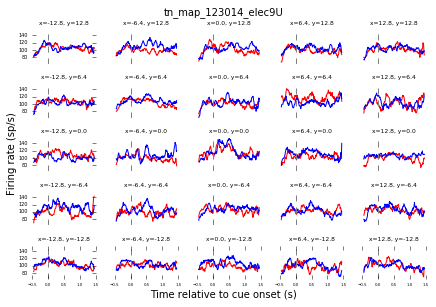

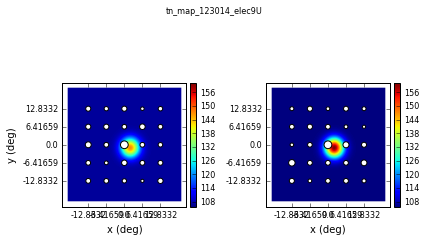

In [7]:
experiment.demo(one_example=False)

# Population data

#### Population results for receptive field centers
* Scatter plot of receptive field center for each individual neuron
    * Blue/red indicates REW+/REW-, respectively
* Average receptive field center location for REW+ (blue) and REW-(red) neurons
    * left (negative x values) in contralateral (CHECK ON THIS)

saving: /Users/syi115/GitHub/MappingData/model_testng


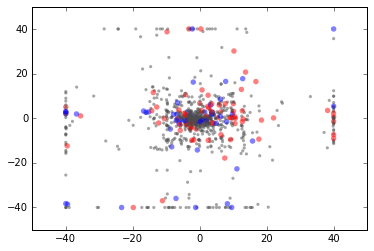

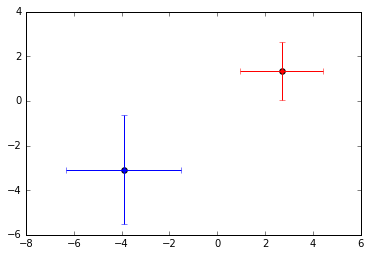

In [8]:
pop = PopParams()
pop.xy_scatter()

# Classifier

#### attempt to group neurons with K-means

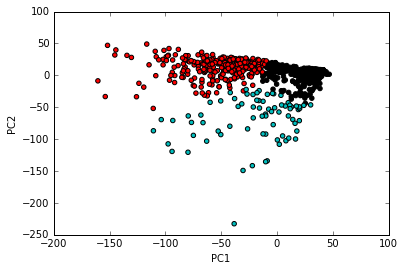

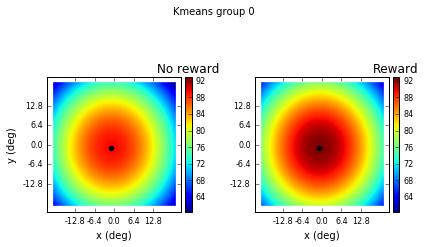

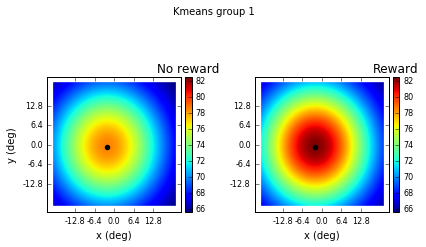

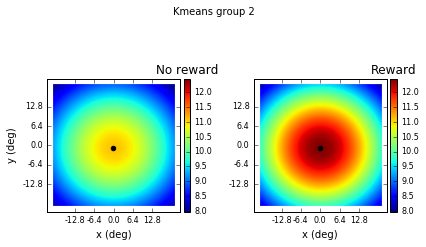

In [7]:
# create clasifier object    
c = classifier.Classifier()   
X = c.get_good_betas(monkey=None)
X1 = c.pca(plot_it=False)    

# classify neurons into 'n_clusters' groups
labels = c.kmeans(X, X1, n_clusters=3)
#c.kmeans_exploratory(X, labels)
#c.kmeans_targeted(X, labels)
c.heatmaps(X, labels)